In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

Data Wrangling & Cleaning

In [5]:
file = open('data/ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [6]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [10]:
# Fill in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [12]:
# Convert dates to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


Exploratory Analysis

In [20]:
# Create Box Plots categorical/object features
cat_features = df[['city','phone','ultimate_black_user']]

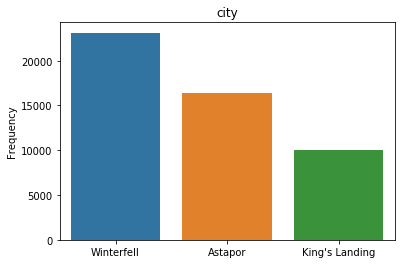

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


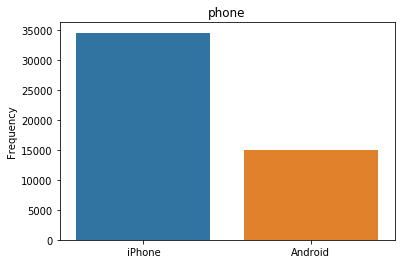

iPhone     34582
Android    15022
Name: phone, dtype: int64


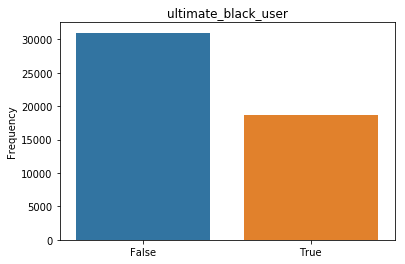

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [21]:
for col in cat_features:
    sns.barplot(x = list(df[col].value_counts().index), y = df[col].value_counts())
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()
    print(df[col].value_counts())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


In [24]:
# Create Distribution Plots of Numerical Features
num_features = df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge',
                  'surge_pct','trips_in_first_30_days','weekday_pct']]

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


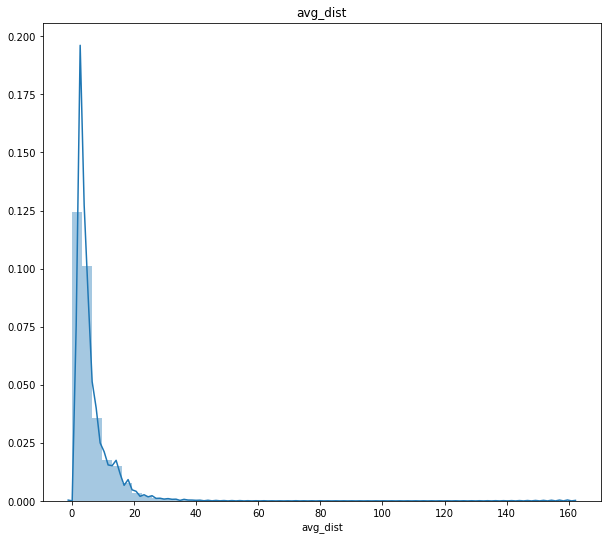

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


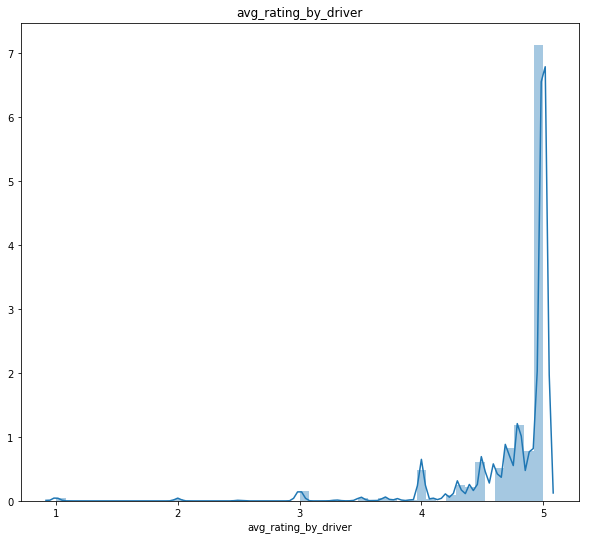

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


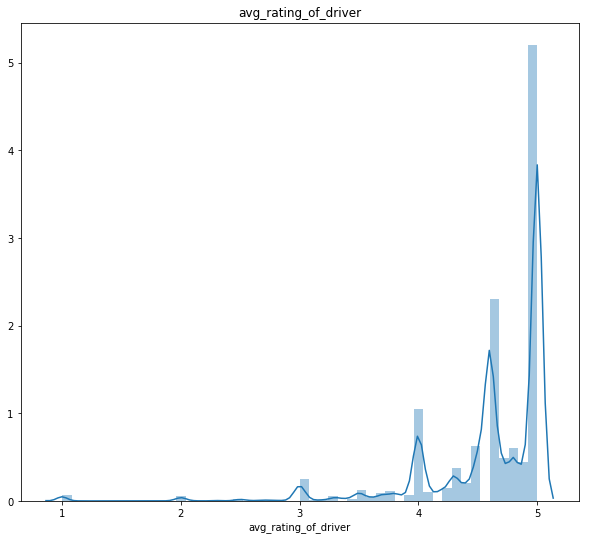

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


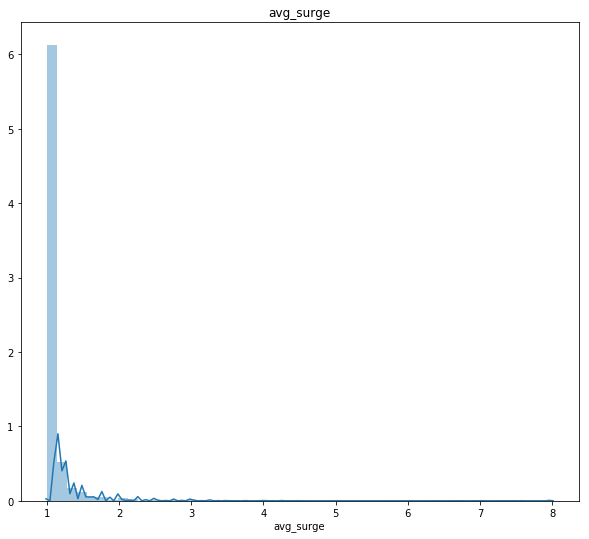

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


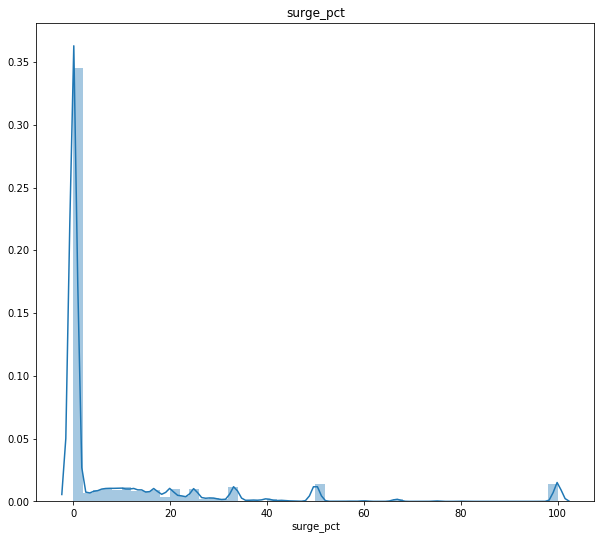

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


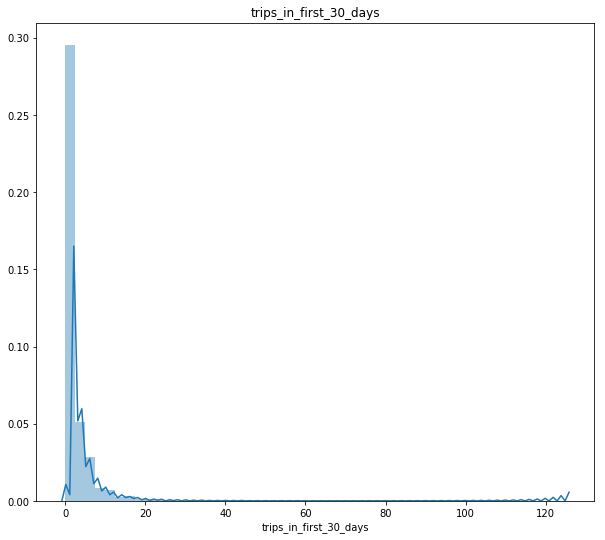

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


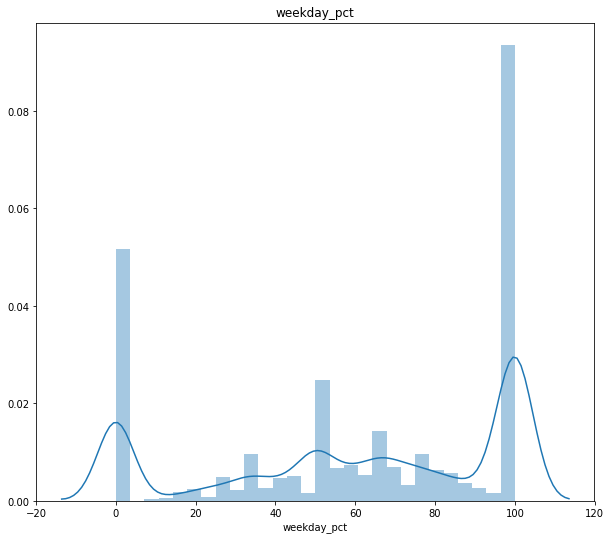

In [44]:
for feature in num_features:
    fig = plt.gcf()
    fig.set_size_inches(10., 8.8)
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

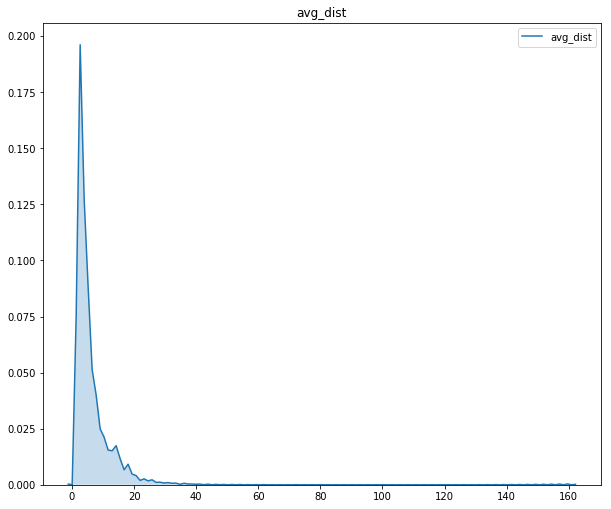

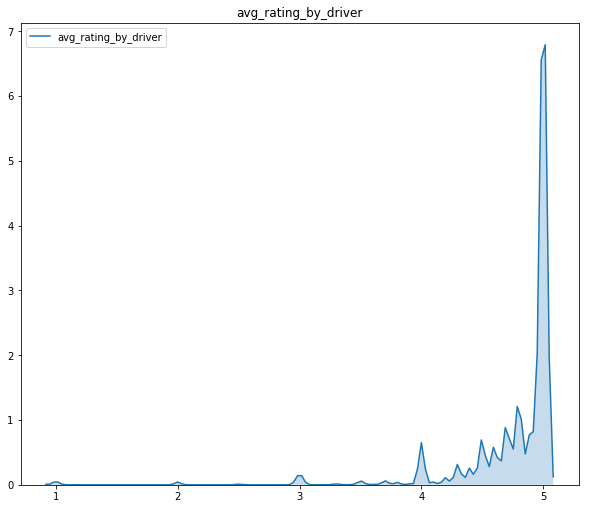

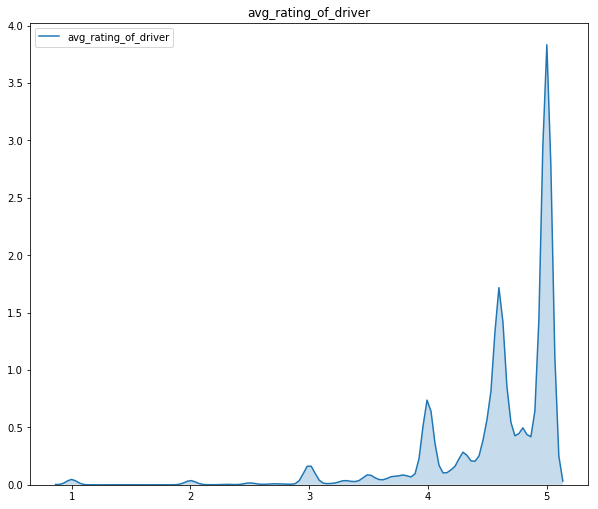

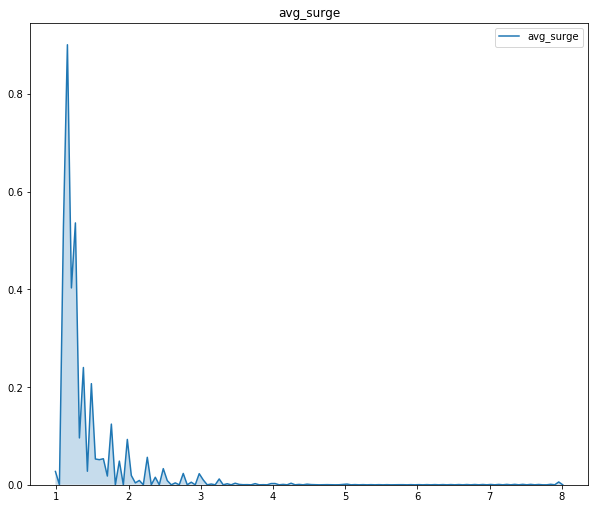

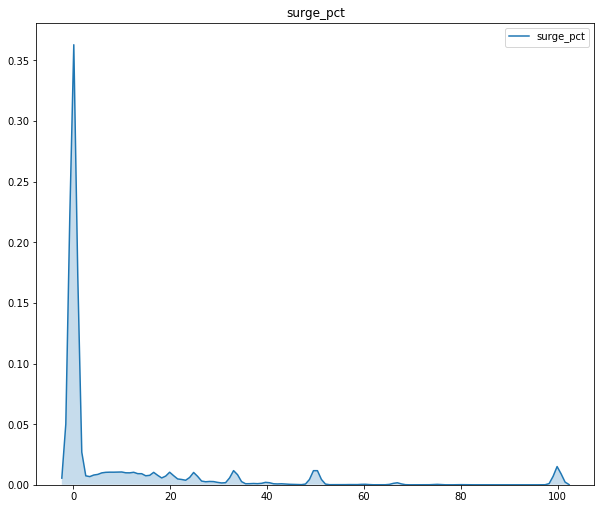

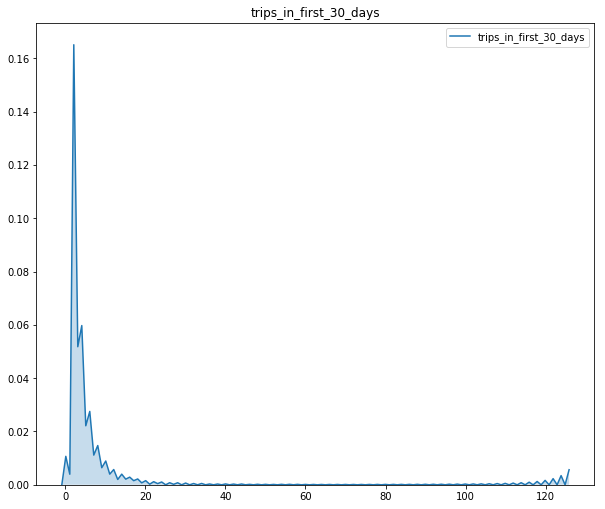

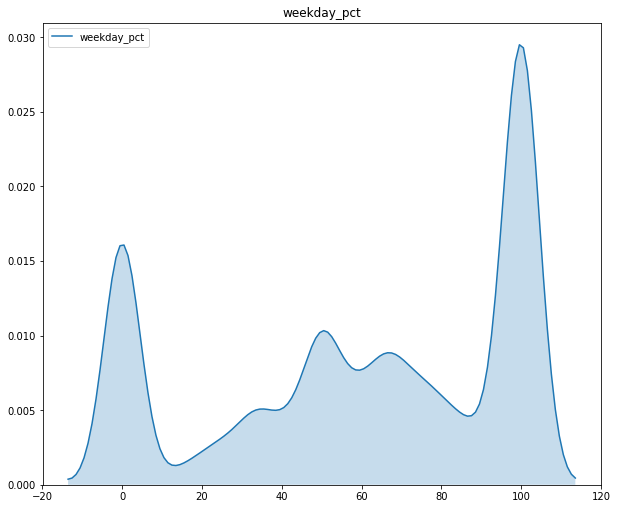

In [45]:
for feature in num_features:
    fig = plt.gcf()
    fig.set_size_inches(10., 8.5)
    sns.kdeplot(df[feature], shade=True)
    plt.title(feature)
    plt.show();

It represents pairwise relation across the entire dataframe and supports an additional argument called hue for categorical separation. What it does basically is create a jointplot between every possible numerical column and takes a while if the dataframe is really huge.

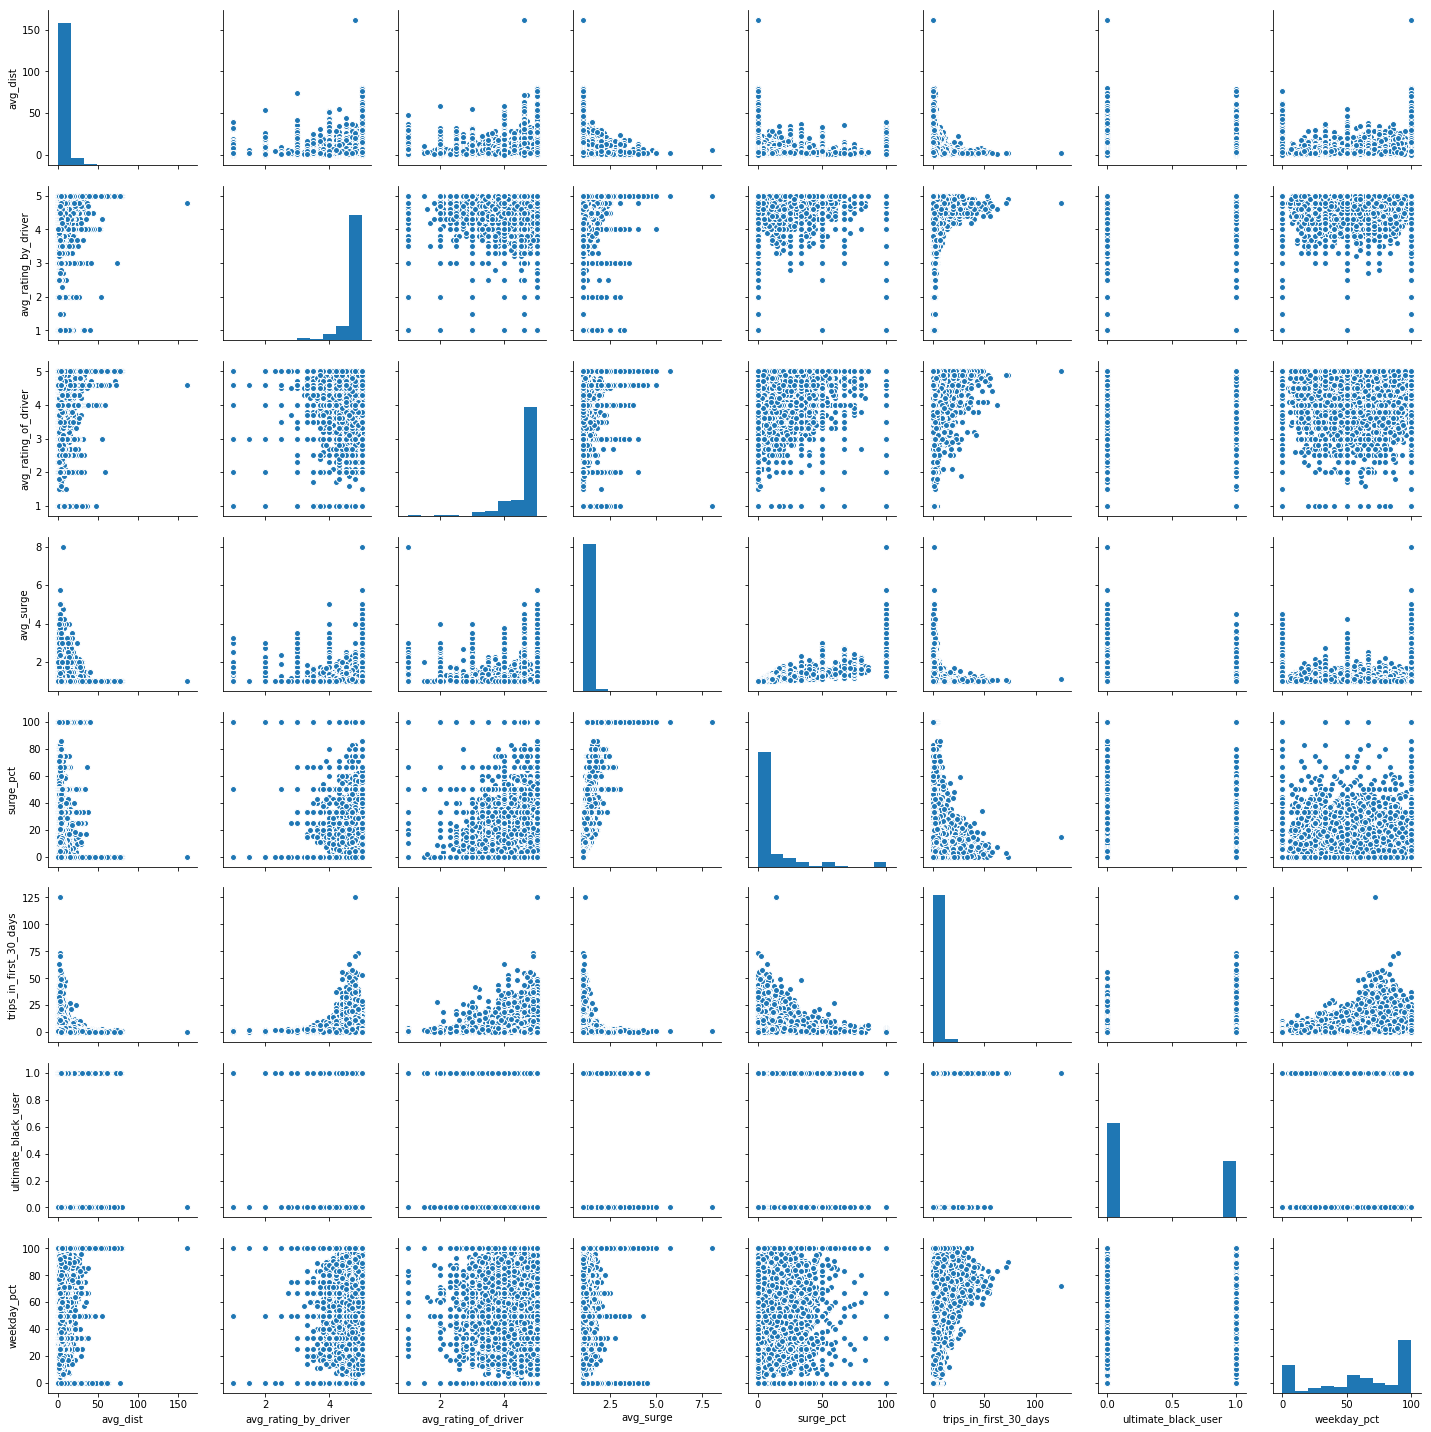

In [46]:
sns.pairplot(df)

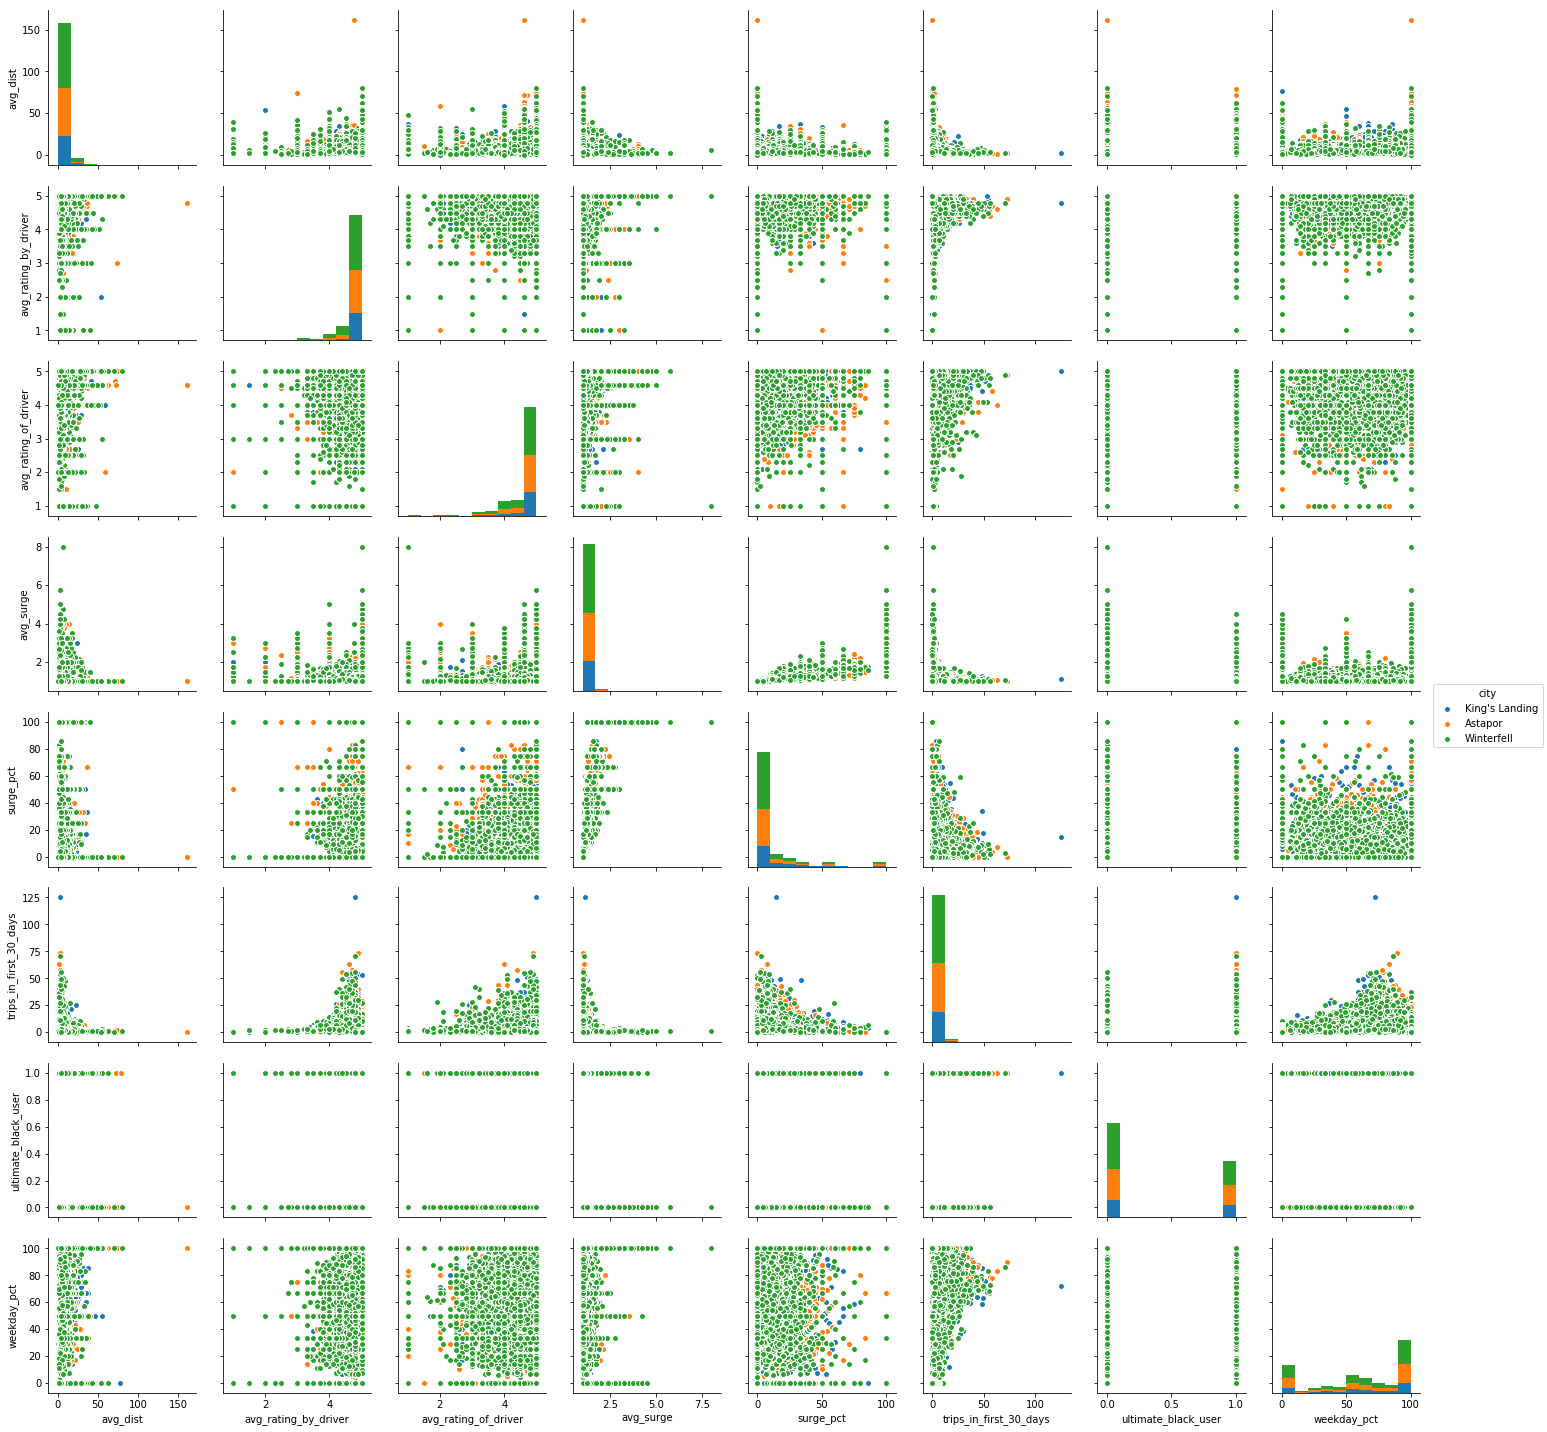

In [47]:
sns.pairplot(df,hue='city')

What amount of users were retained?
We determine this by seeing if they took a trip in the last 30 days, meaning they took a trip after 2014-06-01

In [48]:
df.sort_values('last_trip_date').tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
45516,2.32,4.8,4.4,1.14,King's Landing,2014-07-01,Android,2014-01-25,17.9,2,False,83.9
12139,2.64,4.8,4.9,1.02,King's Landing,2014-07-01,Android,2014-01-18,3.9,16,False,74.0
18814,6.22,4.8,4.7,1.02,Astapor,2014-07-01,iPhone,2014-01-10,3.2,3,False,67.7
12085,6.80,4.9,4.7,1.04,Winterfell,2014-07-01,iPhone,2014-01-24,15.4,1,True,38.5
31587,5.63,4.7,4.9,1.07,Winterfell,2014-07-01,iPhone,2014-01-19,6.0,12,True,70.0


In [49]:
df['last_trip_date'].sort_values().tail()

45516   2014-07-01
12139   2014-07-01
18814   2014-07-01
12085   2014-07-01
31587   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [50]:
percent_retained = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(percent_retained*100))

36.65% of the observed users were retained.


Data Modeling
Our target variable will be retained users, so our first step is to add this to our dataframe
We'll then create a predictive model to find the most important features in predicting retained users

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [51]:
df['retained'] = (df['last_trip_date'] > '2014-06-01') * 1
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
retained                  49604 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 6.0+ MB


In [53]:
# Dropping datetime features
df.drop(['last_trip_date','signup_date'], axis=1, inplace=True)

In [55]:
# Get dummies for categorical features
new_df = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)
new_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,0,0


In [60]:
# Split data into training and test sets
X = new_df.drop('retained',axis=1)
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,1,0,0


In [61]:
y = new_df['retained']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int32

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


We will use Random Forest Classifier here. Random forests algorithm is among the most popular machine learning methods thanks to its relatively good accuracy, robustness and ease of use. It is also often used for feature selection.

Below are the advantages of random forest algorithm compared with other classification algorithms.

The overfitting problem will never come when we use the random forest algorithm in any classification problem.
The random forest algorithm can be used for feature engineering.
Which means identifying the most important features out of the available features from the training dataset.

In [81]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores.round(3))*100))

[0.76830037 0.75935492 0.7661585  0.76590651 0.76307498]
Average 5-Fold CV Score: 76.44


In [82]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [83]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [84]:
# Instantiate the GridSearchCV object
gs_clf = GridSearchCV(rf_clf, param_grid, cv=5)
# build model    
gs_clf.fit(X_train, y_train)
# predict using model
y_predict = gs_clf.predict(X_test)

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

In [85]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(gs_clf.best_params_))
print("Tuned Score: {}".format(gs_clf.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 8, 'n_estimators': 200, 'oob_score': False}
Tuned Score: 0.7678350931129199

Test set performance:
Accuracy:  0.7601048281423244
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



After hyperparameter tuning we get our best parameters; max_features=8, n_estimators=200, oob_score=False with accuracy of 76.78%

In [90]:
rfc = RandomForestClassifier(n_estimators=200, max_features=8, oob_score=False)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [91]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 76.25%


In [92]:
feature_importance = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
feature_importance.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
0,avg_dist,0.297462
1,avg_rating_by_driver,0.146557
6,weekday_pct,0.114782
4,surge_pct,0.091428
2,avg_rating_of_driver,0.080618


From the importance of features, we find that the most important 3 features are:

    1. avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    2. avg_rating_by_driver: the rider’s average rating over all of their trips
    3. weekday_pct: the percent of the user’s trips occurring during a weekday

Suggestions to Ultimate

To improve long-term rider retention, Ultimate need improve in the following aspects:
    1. Give riders incentives to take longer trips during their first 30 days of ridership.
    2. Improve quality of service to get higher ratings from the riders. Ask riders what can be approved upon if they give a low rating.
    3. Encourage riders to take trips during weekdays so this becomes part of their daily routine.